Import 

In [ ]:
import glob
import cv2
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
!pwd

/content


We load the data with glob

In [ ]:
lst_fire_img = glob.glob('/content/fire_dataset/fire_images/*.png')
lst_non_fire_img = glob.glob('/content/fire_dataset/non_fire_images/*.png')

In [ ]:
lst_non_fire_img

['/content/fire_dataset/non_fire_images/non_fire.23.png',
 '/content/fire_dataset/non_fire_images/non_fire.84.png',
 '/content/fire_dataset/non_fire_images/non_fire.112.png',
 '/content/fire_dataset/non_fire_images/non_fire.133.png',
 '/content/fire_dataset/non_fire_images/non_fire.52.png',
 '/content/fire_dataset/non_fire_images/non_fire.142.png',
 '/content/fire_dataset/non_fire_images/non_fire.178.png',
 '/content/fire_dataset/non_fire_images/non_fire.129.png',
 '/content/fire_dataset/non_fire_images/non_fire.203.png',
 '/content/fire_dataset/non_fire_images/non_fire.17.png',
 '/content/fire_dataset/non_fire_images/non_fire.205.png',
 '/content/fire_dataset/non_fire_images/non_fire.160.png',
 '/content/fire_dataset/non_fire_images/non_fire.19.png',
 '/content/fire_dataset/non_fire_images/non_fire.27.png',
 '/content/fire_dataset/non_fire_images/non_fire.214.png',
 '/content/fire_dataset/non_fire_images/non_fire.219.png',
 '/content/fire_dataset/non_fire_images/non_fire.24.png',
 '/c

In [ ]:
print('Number of images with fire : {}'.format(len(lst_fire_img)))
print('Number of images with fire : {}'.format(len(lst_non_fire_img)))

Number of images with fire : 755
Number of images with fire : 244


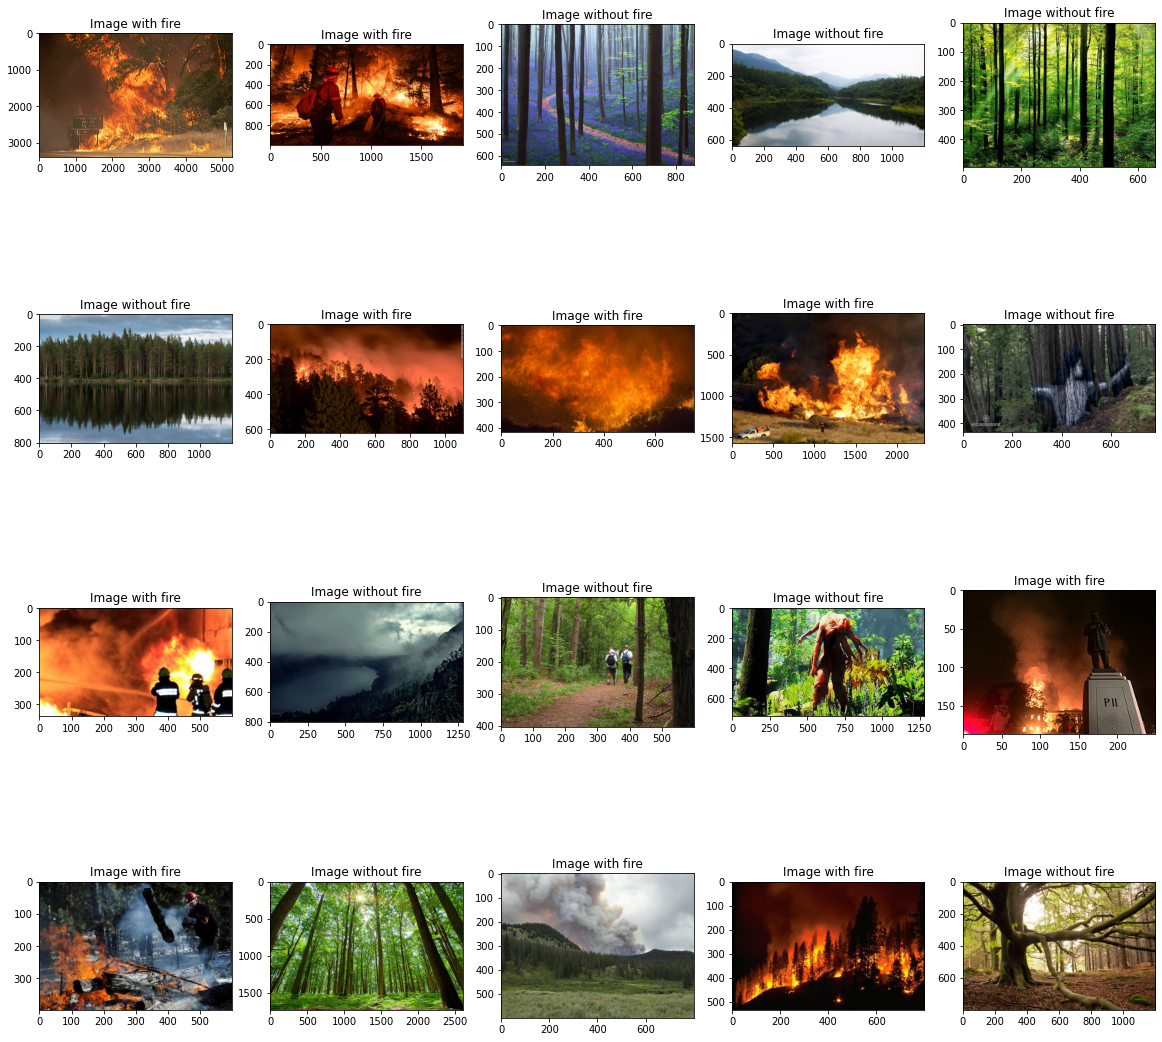

In [ ]:
lst_images_random = random.sample(lst_fire_img,10) + random.sample(lst_non_fire_img,10)
random.shuffle(lst_images_random)

plt.figure(figsize = (20,20))

for i in range(len(lst_images_random)):
    
    plt.subplot(4,5,i+1)


    if "non_fire" in lst_images_random[i]:
        img = cv2.imread(lst_images_random[i])
        img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
        plt.imshow(img,cmap = 'gray')
        plt.title('Image without fire')

    else:
        img = cv2.imread(lst_images_random[i])
        img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
        plt.imshow(img,cmap = 'gray')
        plt.title("Image with fire")



plt.show()

We create a dataframe with filepath images and label (1 = fire , 0 = without fire)

In [ ]:
lst_fire = []
for x in lst_fire_img:
  lst_fire.append([x,1])
lst_nn_fire = []
for x in lst_non_fire_img:
  lst_nn_fire.append([x,0])
lst_complete = lst_fire + lst_nn_fire
random.shuffle(lst_complete)

In [ ]:
df = pd.DataFrame(lst_complete,columns = ['files','target'])
df.head(10)

,files,target
0,/content/fire_dataset/non_fire_images/non_fire...,0
1,/content/fire_dataset/fire_images/fire.143.png,1
2,/content/fire_dataset/fire_images/fire.515.png,1
3,/content/fire_dataset/non_fire_images/non_fire...,0
4,/content/fire_dataset/fire_images/fire.415.png,1
5,/content/fire_dataset/non_fire_images/non_fire...,0
6,/content/fire_dataset/non_fire_images/non_fire...,0
7,/content/fire_dataset/fire_images/fire.339.png,1
8,/content/fire_dataset/fire_images/fire.639.png,1
9,/content/fire_dataset/fire_images/fire.183.png,1


In [ ]:
filepath_img = '/fire_dataset/fire_dataset/non_fire_images/non_fire.189.png'
df = df.loc[~(df.loc[:,'files'] == filepath_img),:]

In [ ]:
df.shape

(999, 2)

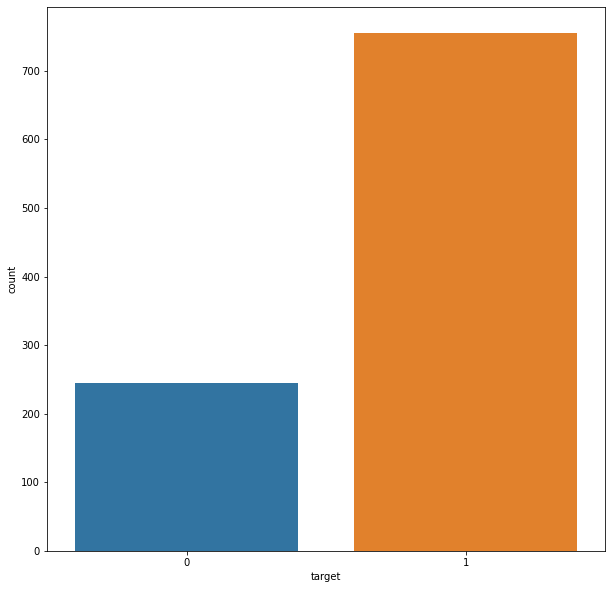

In [ ]:
plt.figure(figsize = (10,10))


sns.countplot(x = "target",data = df)

plt.show()

Image Preprocessing

In [ ]:
from skimage import io

def preprocessing_image(filepath):
  img = io.imread(filepath)
  img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR) #convert
  img = cv2.resize(img,(196,196))  # resize
  img = img / 255 #scale
  return img 

In [ ]:
def create_format_dataset(dataframe):
  X = []
  y = []
  for f,t in dataframe.values:
    X.append(preprocessing_image(f))
    y.append(t)
  
  return np.array(X),np.array(y)

In [ ]:
X, y = create_format_dataset(df)

In [ ]:
X.shape,y.shape

((999, 196, 196, 3), (999,))

Splitting the data

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,stratify = y)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((699, 196, 196, 3), (300, 196, 196, 3), (699,), (300,))

In [ ]:
model = Sequential()

model.add(Conv2D(128,(2,2),input_shape = (196,196,3),activation='relu'))
model.add(Conv2D(64,(2,2),activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32,(2,2),activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(128))
model.add(Dense(1,activation= "sigmoid"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 195, 195, 128)     1664      
                                                                 
 conv2d_1 (Conv2D)           (None, 194, 194, 64)      32832     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 97, 97, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 96, 96, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 73728)             0

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss',patience = 10,restore_best_weights=True)]
model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs = 5,batch_size = 32,callbacks = callbacks)

Epoch 1/5
22/22 [==============================] - 248s 11s/step - loss: 0.4879 - accuracy: 0.8898 - val_loss: 0.2339 - val_accuracy: 0.8800
Epoch 2/5
22/22 [==============================] - 254s 12s/step - loss: 0.1552 - accuracy: 0.9342 - val_loss: 0.1228 - val_accuracy: 0.9567
Epoch 3/5
22/22 [==============================] - 257s 12s/step - loss: 0.0877 - accuracy: 0.9685 - val_loss: 0.0994 - val_accuracy: 0.9433
Epoch 4/5
22/22 [==============================] - 237s 11s/step - loss: 0.0429 - accuracy: 0.9857 - val_loss: 0.1094 - val_accuracy: 0.9567
Epoch 5/5
22/22 [==============================] - 255s 12s/step - loss: 0.0329 - accuracy: 0.9886 - val_loss: 0.2126 - val_accuracy: 0.9467


In [ ]:
y_pred = model.predict(X_test)

10/10 [==============================] - 24s 2s/step


In [ ]:
y_pred = y_pred.reshape(-1)
y_pred[y_pred<0.5] = 0
y_pred[y_pred>=0.5] = 1
y_pred = y_pred.astype('int')

In [ ]:
y_pred

array([0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1])

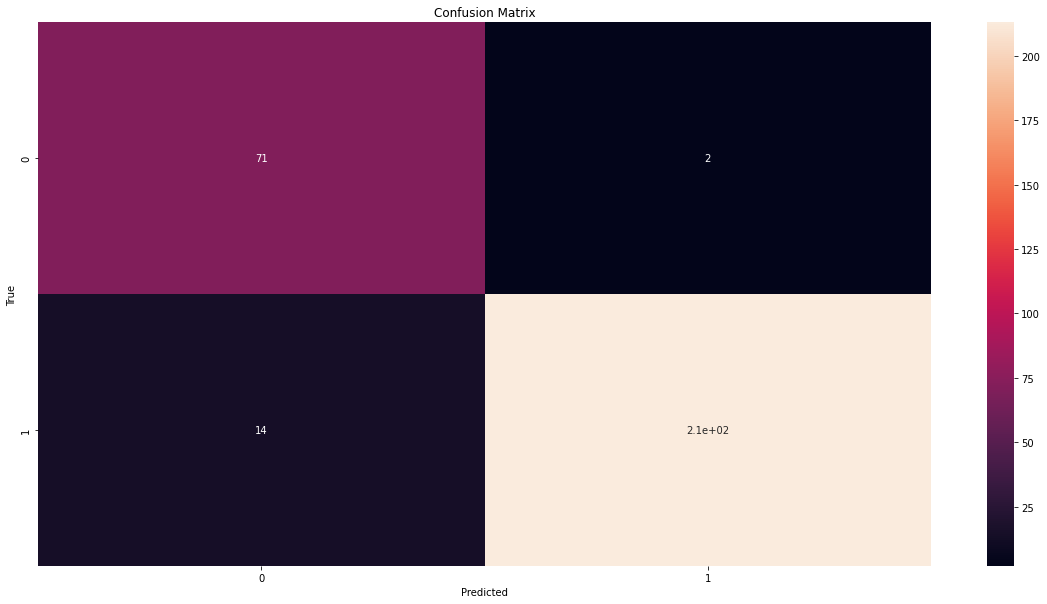

In [ ]:
plt.figure(figsize = (20,10))

sns.heatmap(confusion_matrix(y_test,y_pred),annot = True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90        73
           1       0.99      0.94      0.96       227

    accuracy                           0.95       300
   macro avg       0.91      0.96      0.93       300
weighted avg       0.95      0.95      0.95       300

